# Marketing Campaign Analysis

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khanimar/marketing-campaign-analysis-data")

print("Path to dataset files:", path)

100%|██████████| 0.98M/0.98M [00:00<00:00, 79.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/khanimar/marketing-campaign-analysis-data/versions/1


## Import Library and Dataset

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# List the files in the downloaded directory
print(os.listdir(path))

['test.csv', 'train.csv']


In [4]:
file_path_train = os.path.join(path, 'train.csv')
file_path_test = os.path.join(path, 'test.csv')

# Read the CSV file into a DataFrame
df_train = pd.read_csv(file_path_train)

df_train.tail(10)

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
31470,432182367,no,3,jun,97,69535692,55,female,entrepreneur,married,uniGraduated,no,82,no,no,cellPhone,1,NaN,0,unknown
31471,432156115,no,10,jul,497,69535789,31,female,manager,married,uniGraduated,no,181,yes,no,cellPhone,1,NaN,0,unknown
31472,432150248,no,30,may,85,69536716,25,male,worker,single,secondarySchool,no,155,yes,no,unknown,4,NaN,0,unknown
31473,432165623,no,27,aug,103,69540425,43,female,houseWife,married,uniGraduated,no,0,no,no,cellPhone,6,NaN,0,unknown
31474,432170545,no,29,jan,173,69542001,53,female,worker,married,highSchool,no,-76,no,no,cellPhone,1,164.0,4,other
31475,432184725,yes,30,nov,1628,69542367,58,female,technical,married,highSchool,no,3399,no,no,landline,2,188.0,8,success
31476,432147139,no,21,may,173,69542565,40,female,manager,single,secondarySchool,no,858,yes,no,unknown,1,NaN,0,unknown
31477,432166958,no,17,nov,422,69543453,51,female,worker,married,highSchool,no,1414,yes,no,unknown,3,186.0,2,failure
31478,432166312,no,29,aug,69,69544121,30,male,technical,married,uniGraduated,no,1,no,no,cellPhone,21,NaN,0,unknown
31479,432171709,no,2,feb,171,69546604,50,male,technical,divorced,highSchool,no,8,no,no,cellPhone,2,5.0,1,other


## Data Cleaning

In [5]:
#check null values in train
df_train.isnull().sum()

,0
id,0
target,0
day,0
month,0
duration,0
contactId,0
age,0
gender,0
job,0
maritalStatus,0


In [ ]:
#Check "daySinceLastCampaign" unique value
df_train['daySinceLastCampaign'].min()

1.0

In [6]:
# Delete id and contactid column
df_train.drop(['id', 'contactId'], axis=1, inplace=True)

In [7]:
# Change NaN value in "daySinceLastCampaign" with -1 as Never using Campaign at all
df_train['daySinceLastCampaign'].fillna(-1, inplace=True)

/tmp/ipython-input-7-1001636836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['daySinceLastCampaign'].fillna(-1, inplace=True)


After checked the daySinceLastCampaign column there is so many null values. So i decided to fill the nan value with -1 for people who never get campaign before

In [ ]:
# check duplicate value
df_train.duplicated().sum()

np.int64(0)

In [ ]:
# # Save csv file
# df_train.to_csv('MarketingCampaignAnalysis.csv', index=False)

## EDA

<Axes: xlabel='target'>

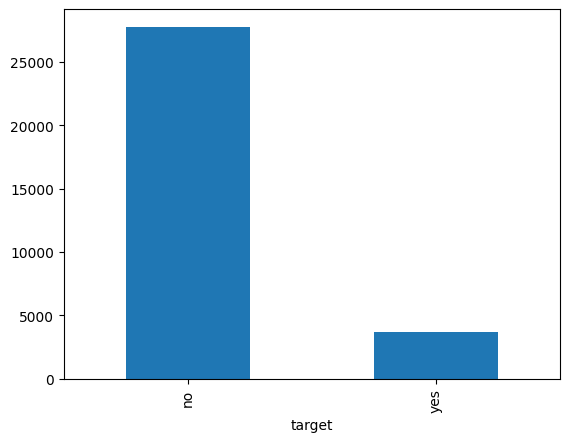

In [ ]:
# Visualize Success and Failure Campaign in "target"

# Change yes as Success and no as Failure
df_train['target'].map({'yes': 'Success', 'no': 'Failure'})
df_train['target'].value_counts().plot(kind='bar')


The target variable is highly imbalanced, with a significantly higher number of "no" responses than "yes" responses to the marketing campaign. This indicates that most people tend to reject the campaign offers.

<Axes: xlabel='lastCampaignResult'>

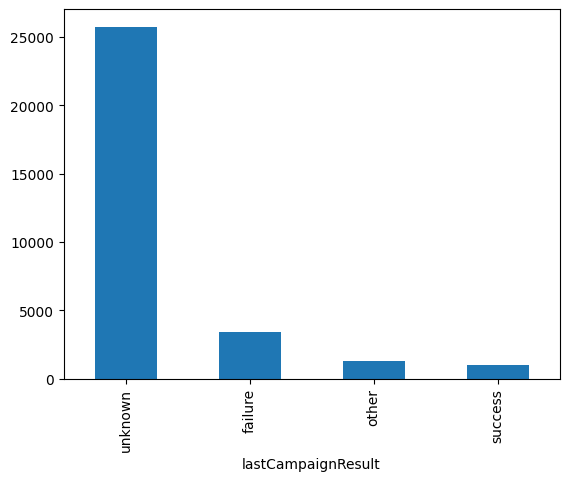

In [8]:
# Visualize lastCampaignResult
df_train['lastCampaignResult'].value_counts().plot(kind='bar')

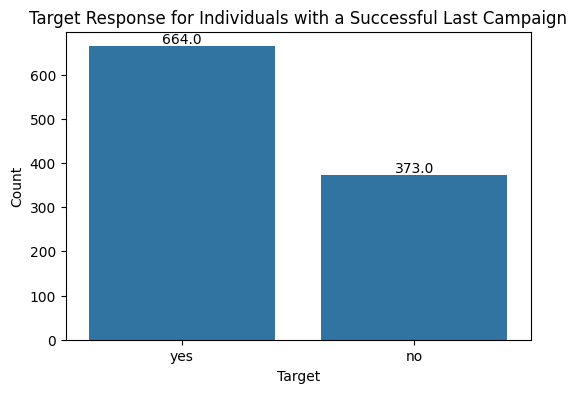

In [38]:
# Comparing lastCampaignResult and target
success_last_campaign = df_train[df_train['lastCampaignResult'] == 'success']


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='target', data=success_last_campaign)
plt.title('Target Response for Individuals with a Successful Last Campaign')
plt.xlabel('Target')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.show()

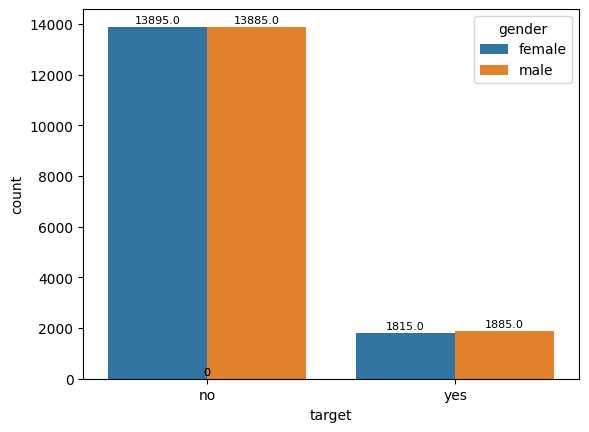

In [ ]:
# Visualize target by their gender

ax = sns.countplot(x='target', hue='gender', data=df_train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

Gender doesn't seem to have a significant impact on the campaign outcome, as the distribution of "yes" and "no" responses is similar across both genders.

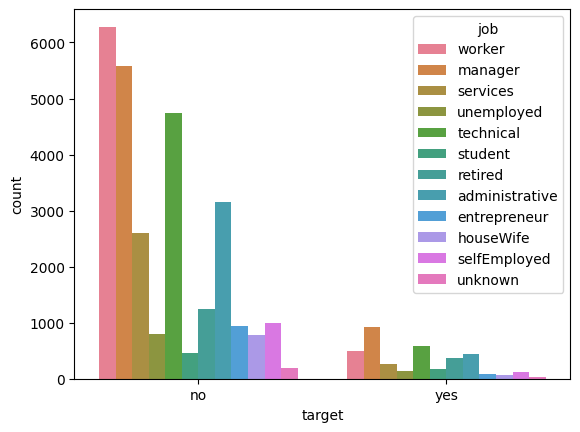

In [ ]:
# Visualize target by their job
ax = sns.countplot(x='target', hue='job', data=df_train)

From visual above even no responses have more answer than yes, but yes and no respones have same pattern (except manager and worker).

Manager job had the most yes response, meanwhile worker job had the most no responses.



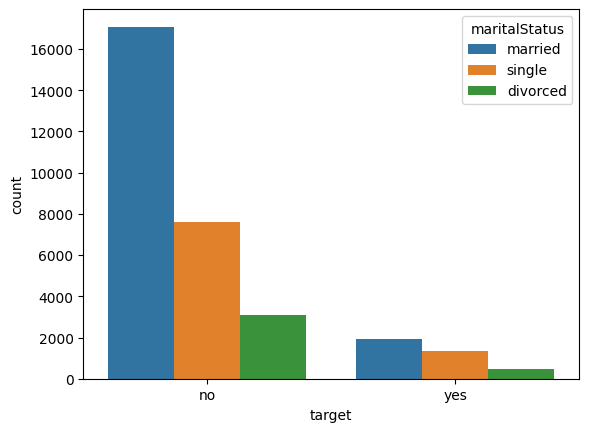

In [ ]:
# Visualize target by their maritalStatus

ax = sns.countplot(x='target', hue='maritalStatus', data=df_train)

Whether the responses yes or no, married people had the most response compare to other

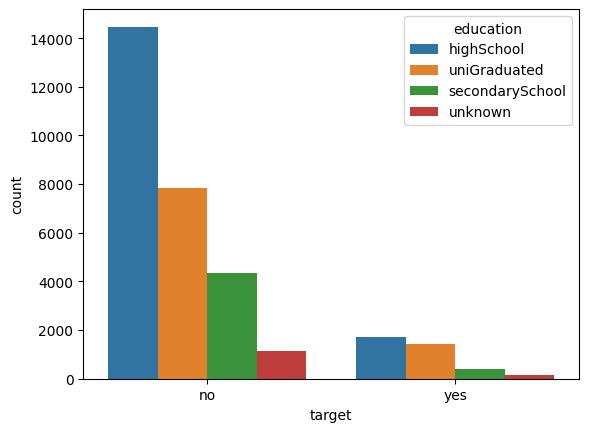

In [ ]:
# Visualize target by their education

ax = sns.countplot(x='target', hue='education', data=df_train)

Whether the responses yes or no, high school education had the most response compare to other

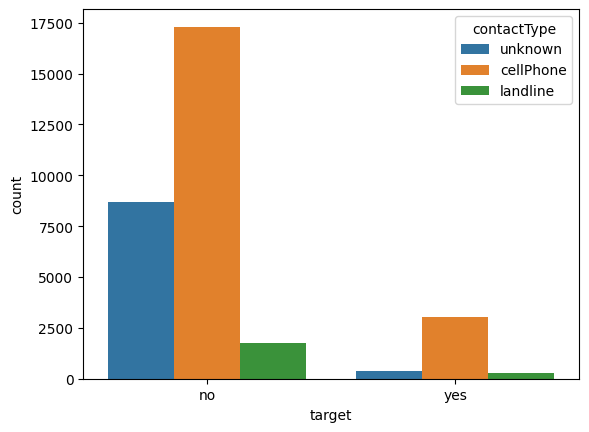

In [ ]:
# Visualize target by their contacttype
# df_train_withoutUnknown = df_train[df_train['contactType'] != 'unknown']

ax = sns.countplot(x='target', hue='contactType', data=df_train)

Whether the responses yes or no, cellphone method education had the most response compare to other

In [ ]:
numerical_column = ['day','duration', 'age','accountBalance',  'numberOfContacts',
       'daySinceLastCampaign', 'numberOfContactsLastCampaign']

df_train[numerical_column].groupby(df_train['target']).mean()

,day,duration,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
target,,,,,,,
no,15.903384,221.600036,40.829770,1287.468143,2.866379,36.415551,0.507847
yes,15.015405,535.535135,41.731351,1807.032703,2.128649,68.985676,1.158649


From data above we can see that yes respones had much more duration and account balance and also have a higher average for numberOfContactsLastCampaign, which could indicate that people who have been contacted multiple times are more likely to respond positively.

<Axes: xlabel='age', ylabel='Count'>

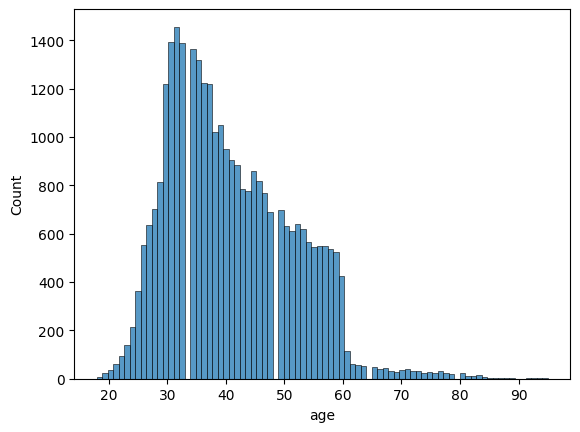

In [ ]:
# Visualize Age distribution
sns.histplot(df_train['age'])

In [ ]:
df_train['age'].describe()

,age
count,31480.000000
mean,40.935737
std,10.629198
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


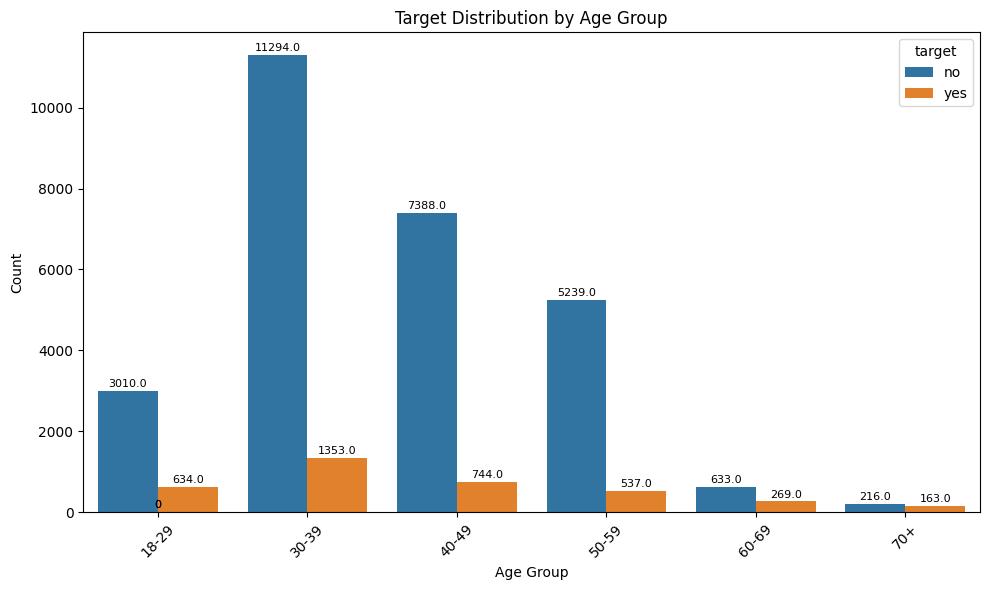

In [ ]:
# Visualize target distribution by age groups
age_bins = [18, 30, 40, 50, 60, 70, 96]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_train['age_group'] = pd.cut(df_train['age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='age_group', hue='target', data=df_train, order=age_labels)
plt.title('Target Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

From the image above, we can see that most people who refuse are around 30-39 years old, which is the age group that has just been exposed to marketing campaigns and is seeking financial stability. Meanwhile, the later age groups have more stable incomes.

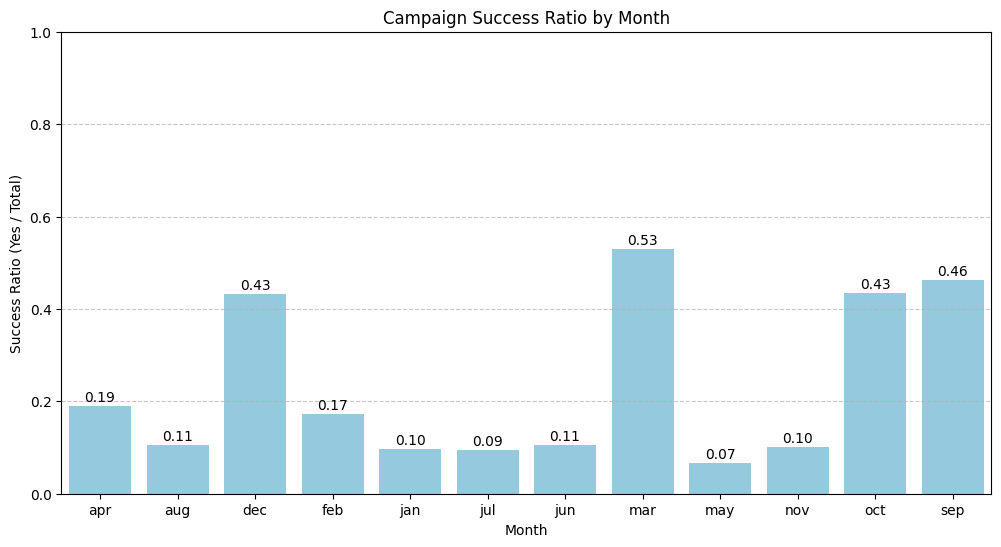

In [ ]:
# 1. Hitung jumlah 'yes' dan 'no' per bulan
monthly_counts = df_train.groupby(['month', 'target']).size().unstack(fill_value=0)

monthly_counts['total'] = monthly_counts['yes'] + monthly_counts['no']
monthly_counts['success_ratio'] = monthly_counts['yes'] / monthly_counts['total']


monthly_ratios = monthly_counts.reset_index()

# 3. Visualisasikan rasio keberhasilan
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='success_ratio', data=monthly_ratios, color='skyblue')
plt.title('Campaign Success Ratio by Month')
plt.xlabel('Month')
plt.ylabel('Success Ratio (Yes / Total)')
plt.ylim(0, 1) # Rasio selalu antara 0 dan 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, row in monthly_ratios.iterrows():
    plt.text(index, row['success_ratio'] + 0.01, f'{row["success_ratio"]:.2f}', color='black', ha='center')

plt.show()


monthly_counts['yes_to_no_ratio'] = monthly_counts.apply(
    lambda row: row['yes'] / row['no'] if row['no'] != 0 else 0, axis=1
)

Of the 12 months with the highest success rate, March was 53%.

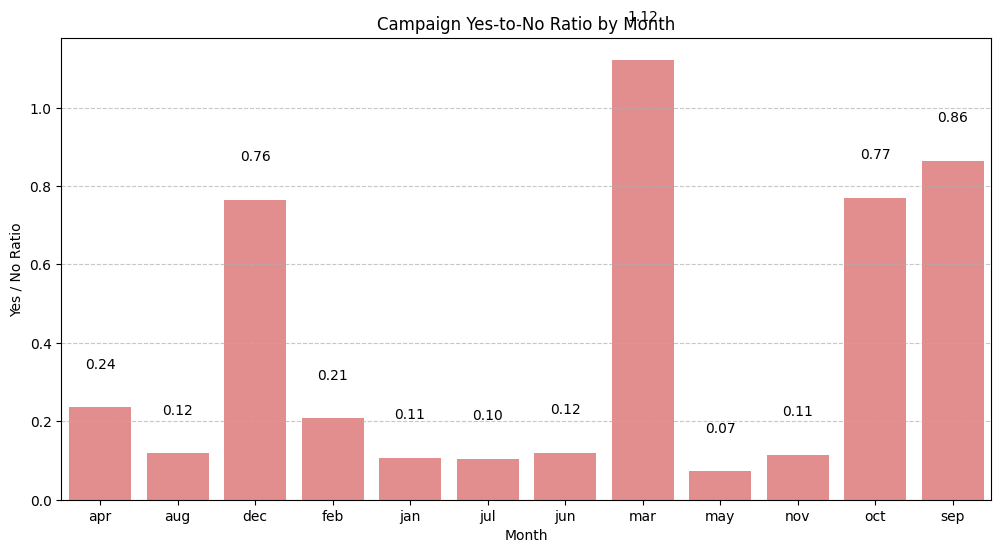

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='yes_to_no_ratio', data=monthly_counts.reset_index(), color='lightcoral')
plt.title('Campaign Yes-to-No Ratio by Month')
plt.xlabel('Month')
plt.ylabel('Yes / No Ratio')

plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, row in monthly_counts.reset_index().iterrows():
    plt.text(index, row['yes_to_no_ratio'] + 0.1, f'{row["yes_to_no_ratio"]:.2f}', color='black', ha='center')
plt.show()

March the only month that had more yes responses than no respones

## Business Advice


1.   Prioritize Manager job for being marketing campaign target
2.   Target directed to individuals aged 60 and above may have higher success rate
3. Leverage March
4. For younger age groups (30-39), consider tailoring the message to address financial stability or long-term benefits. For older age groups, focus on benefits relevant to their life stage.
5. Develop campaign message of different job roles, especially for "Manager" and "Worker"
6. Investigate Duration and Account Balance to find why longer call correlate with positive response. This may indicate effective communcation and detailed explanation will lead to positive response. And consider campaign should be tailored based on account balance.



## Data Transformation

In [ ]:
# delete age_group column
df_train.drop('age_group', axis=1, inplace=True)

In [ ]:
# One hot encoding categorical column
categorical_column = ['job', 'maritalStatus', 'contactType','month', 'lastCampaignResult']

df_train = pd.get_dummies(df_train, columns=categorical_column)

In [ ]:
education_order = {
    'unknown': 0,
    'secondarySchool': 1,
    'highSchool': 2,
    'uniGraduated': 3
}

df_train['education_encoded'] = df_train['education'].map(education_order)

df_train = df_train.drop('education', axis=1)

In [ ]:
# Change gender, house, credit, and creditFailure value to 0 and 1
# Change target value to 1 and 0
df_train['target'] = df_train['target'].map({'no': 0, 'yes': 1})
df_train['gender'] = df_train['gender'].map({'male': 1, 'female': 0})
df_train['house'] = df_train['house'].map({'no': 0, 'yes': 1})
df_train['credit'] = df_train['credit'].map({'no': 0, 'yes': 1})
df_train['creditFailure'] = df_train['creditFailure'].map({'no': 0, 'yes': 1})


In [ ]:
# prompt: Find correlation every feature with target column and make value is absolute

# Find the correlation of each feature with the target column and make the value absolute
correlation_with_target = df_train.corr()['target'].abs().sort_values(ascending=False)
print("\nAbsolute correlation of each feature with the target column:")
correlation_with_target


Absolute correlation of each feature with the target column:


,target
target,1.000000
duration,0.394059
lastCampaignResult_success,0.299590
id,0.295875
lastCampaignResult_unknown,0.166636
contactType_unknown,0.150254
daySinceLastCampaign,0.147378
house,0.136624
contactType_cellPhone,0.135108
month_mar,0.134992


In [ ]:
# Calculate the correlation matrix
corr_matrix = df_train.corr()

# Iterate through the correlation matrix and print pairs with correlation > 0.5
print("Feature pairs with correlation > 0.5:")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            print(f"{colname_i} and {colname_j}: {corr_matrix.iloc[i, j]:.2f}")

Feature pairs with correlation > 0.5:
maritalStatus_single and maritalStatus_married: -0.78
contactType_unknown and contactType_cellPhone: -0.86
lastCampaignResult_failure and daySinceLastCampaign: 0.70
lastCampaignResult_unknown and daySinceLastCampaign: -0.87
lastCampaignResult_unknown and numberOfContactsLastCampaign: -0.50
lastCampaignResult_unknown and lastCampaignResult_failure: -0.74


In [ ]:
# delete lastCampaignResult_unknown and education_uniGraduated column
df_train.drop(['lastCampaignResult_unknown'], axis=1, inplace=True)

Cause lastCampaignResult_unknown had many big correlation with other feature so i decide to delete the column

## Training Process

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
import xgboost as xgb
from sklearn.svm import SVC, LinearSVC

In [ ]:
# Separate features (X) and target (y)
X = df_train.drop('target', axis=1)
y = df_train['target']

# use min max scaler for Features X
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of training target:", y_train.shape)
print("Shape of testing target:", y_test.shape)


Shape of training features: (25184, 45)
Shape of testing features: (6296, 45)
Shape of training target: (25184,)
Shape of testing target: (6296,)


In [ ]:
def visualize_metrics(model, X_test, y_test, model_name="Model"):
    """
    Visualizes evaluation metrics for a binary classifier model.

    Includes: classification metrics, confusion matrix (absolute & %),
    classification report, and ROC/AUC curve.

    Args:
        model: Trained scikit-learn model.
        X_test: Test features.
        y_test: Test target.
        model_name: Optional name of the model for display.

    Returns:
        y_pred: Predicted labels.
        y_prob: Predicted probabilities for positive class.
    """
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # --- 1. Classification Metrics ---
    print(f"\n--- {model_name} Evaluation Metrics ---")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print("-" * 40)

    # --- 2. Classification Report ---
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # --- 3. Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(16, 5))

    # Absolute Confusion Matrix
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Confusion Matrix (Counts)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Percentage Confusion Matrix
    plt.subplot(1, 3, 2)
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False,
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Confusion Matrix (%)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # --- 4. ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 3, 3)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    return y_pred, y_prob


In [ ]:
def run_randomized_search(model, param_distributions, X_train, y_train, model_name="Model"):
    """
    General function to perform Randomized Search with cross-validation.

    Args:
        model: The machine learning model to optimize.
        param_distributions: The hyperparameter search space.
        X_train: Training features.
        y_train: Training target.
        model_name: Name of the model (for logging purposes).

    Returns:
        A tuple containing:
        - The best parameters.
        - The best cross-validation score.
        - The best estimator.
    """
    # Define evaluation metrics
    scorers = {
        'precision_score': make_scorer(precision_score, zero_division=0),
        'recall_score': make_scorer(recall_score, zero_division=0),
        'accuracy_score': make_scorer(accuracy_score),
        'f1_score': make_scorer(f1_score, zero_division=0)
    }

    print(f"Starting Randomized Search for {model_name}...")
    random_search = RandomizedSearchCV(
        model,
        param_distributions,
        n_iter=5,
        cv=5,
        scoring=scorers,
        refit='recall_score',
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    random_search.fit(X_train, y_train)
    print(f"Randomized Search for {model_name} completed.")
    print(f"\nBest parameters found for {model_name}:")
    print(random_search.best_params_)
    print(f"Best cross-validation recall_score for {model_name}: {random_search.best_score_}")

    return random_search.best_params_, random_search.best_score_, random_search.best_estimator_


### 1. Logistic Regression Model



Starting Randomized Search for Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Randomized Search for Logistic Regression completed.

Best parameters found for Logistic Regression:
{'C': np.float64(37.455011884736244), 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation recall_score for Logistic Regression: 0.8145270270270271

--- Logistic Regression Evaluation Metrics ---
Accuracy : 0.8466
Precision: 0.4205
Recall   : 0.8081
F1-Score : 0.5532
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5556
           1       0.42      0.81      0.55       740

    accuracy                           0.85      6296
   macro avg       0.70      0.83      0.73      6296
weighted avg       0.91      0.85      0.87      6296



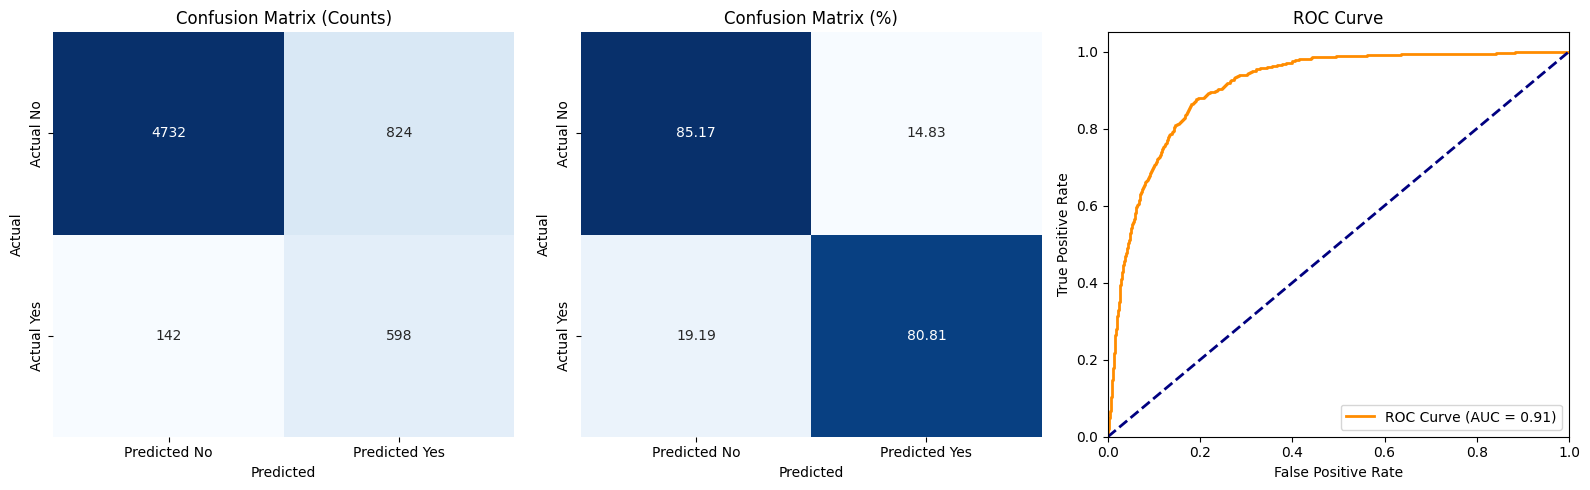

(array([0, 0, 1, ..., 1, 1, 0]),
 array([0.08402761, 0.24048762, 0.68156265, ..., 0.51423356, 0.57517094,
        0.20002451]))

In [ ]:
lr_param_distributions = {
    'C': uniform(0.001, 100),           # Regularization strength
    'penalty': ['l1', 'l2'],            # L1 and L2 regularization
    'solver': ['liblinear', 'saga']     # Solvers supporting l1 and l2
}

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)

best_lr_params, best_lr_score, best_lr_model = run_randomized_search(
    model=lr_model,
    param_distributions=lr_param_distributions,
    X_train=X_train,
    y_train=y_train,
    model_name="Logistic Regression"
)

visualize_metrics(best_lr_model, X_test, y_test, model_name="Logistic Regression")

### 2. Random Forest Model

Starting Randomized Search for Random Forest Classifier...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Randomized Search for Random Forest Classifier completed.

Best parameters found for Random Forest Classifier:
{'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 38, 'min_samples_split': 387, 'n_estimators': 241}
Best cross-validation recall_score for Random Forest Classifier: 0.8756756756756756

--- Random Forest Classifier Evaluation Metrics ---
Accuracy : 0.8169
Precision: 0.3806
Recall   : 0.8892
F1-Score : 0.5330
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5556
           1       0.38      0.89      0.53       740

    accuracy                           0.82      6296
   macro avg       0.68      0.85      0.71      6296
weighted avg       0.91      0.82      0.84      6296



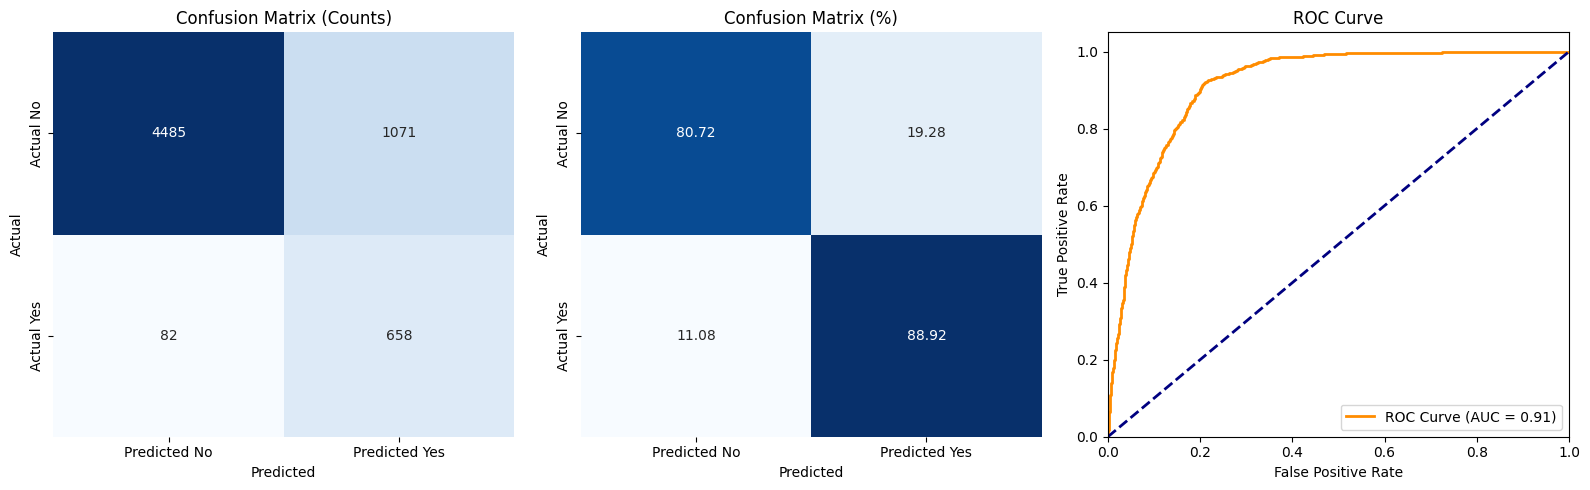

(array([0, 0, 1, ..., 1, 1, 0]),
 array([0.21201741, 0.39658132, 0.56155368, ..., 0.59897165, 0.58294895,
        0.4399635 ]))

In [ ]:
rf_param_distributions = {
    'n_estimators': randint(50, 300),         # Jumlah pohon
    'max_depth': randint(5, 30),              # Kedalaman maksimum pohon
    'min_samples_split': randint(2, 500),      # Minimal sampel untuk split
    'min_samples_leaf': randint(1, 200),       # Minimal sampel di daun
    'max_features': ['sqrt', 'log2', None]    # Fitur maksimum yang dipertimbangkan
}


rf_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

best_rf_params, best_rf_score, best_rf_model = run_randomized_search(
    model=rf_model,
    param_distributions=rf_param_distributions,
    X_train=X_train,
    y_train=y_train,
    model_name="Random Forest Classifier"
)

visualize_metrics(best_rf_model, X_test, y_test, model_name="Random Forest Classifier")

### 3. Extra Trees Classifier Model

Starting Randomized Search for Extra Trees Classifier...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Randomized Search for Extra Trees Classifier completed.

Best parameters found for Extra Trees Classifier:
{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 409}
Best cross-validation recall_score for Extra Trees Classifier: 0.8601351351351351

Extra Trees Classifier Model Evaluation with Best Parameters:
Accuracy on test set: 0.8185
Classification Report on test set:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5556
           1       0.38      0.88      0.53       740

    accuracy                           0.82      6296
   macro avg       0.68      0.85      0.71      6296
weighted avg       0.91      0.82      0.85      6296

--- Classification Metrics ---
Accuracy: 0.8185
Precision: 0.3821
Recall: 0.8824
F1-Score: 0.5333
------------------------------


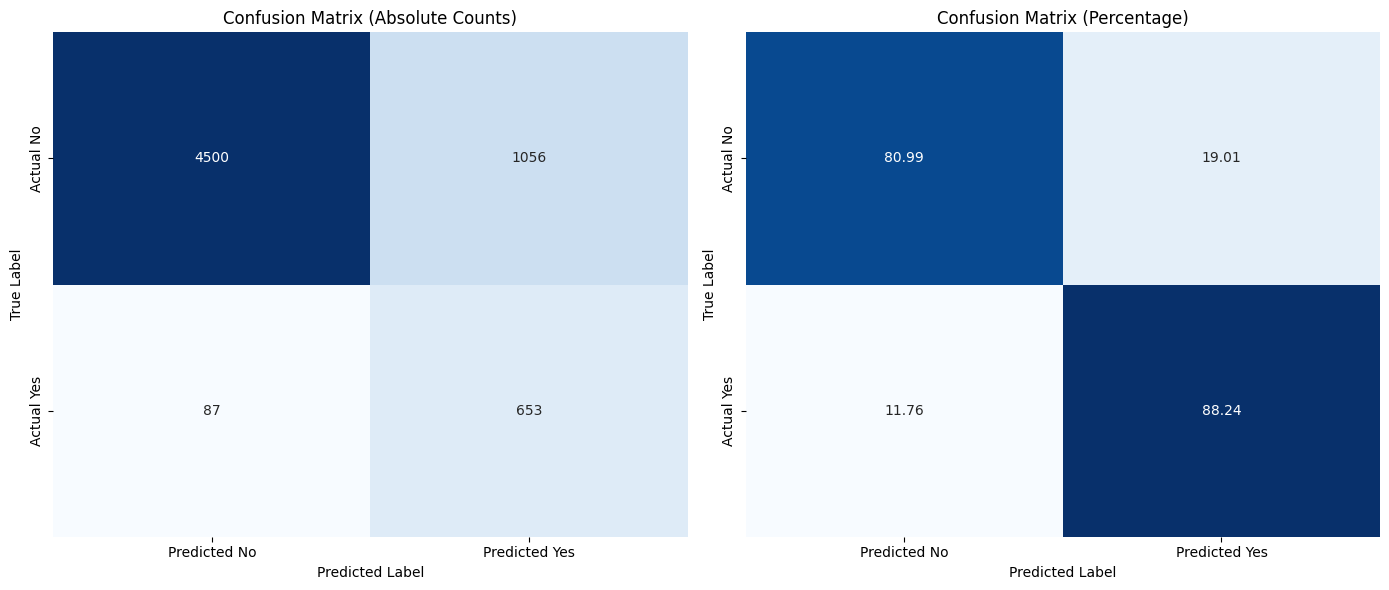

In [ ]:
etc_param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': randint(1, 10)
}

etc_model = ExtraTreesClassifier(class_weight='balanced', random_state=42)

best_params_etc, best_score_etc, best_estimator_etc = run_randomized_search(
    etc_model, etc_param_distributions, X_train, y_train, model_name="Extra Trees Classifier"
)

y_pred_etc, y_prob_gb = visualize_metrics(best_estimator_etc, X_test, y_test, model_name="Extra Trees Classifier")

### 4. Gradient Boosting Classifier

Starting Randomized Search for Gradient Boosting Classifier...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Randomized Search for Gradient Boosting Classifier completed.

Best parameters found for Gradient Boosting Classifier:
{'learning_rate': np.float64(0.10335257864959599), 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 216, 'subsample': np.float64(0.6053059844639466)}
Best cross-validation recall_score for Gradient Boosting Classifier: 0.49695945945945946

--- Gradient Boosting Classifier Evaluation Metrics ---
Accuracy : 0.9074
Precision: 0.6404
Recall   : 0.4838
F1-Score : 0.5512
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5556
           1       0.64      0.48      0.55       740

    accuracy                           0.91      6296
   macro avg       0.79      0.72      0.75      6296
w

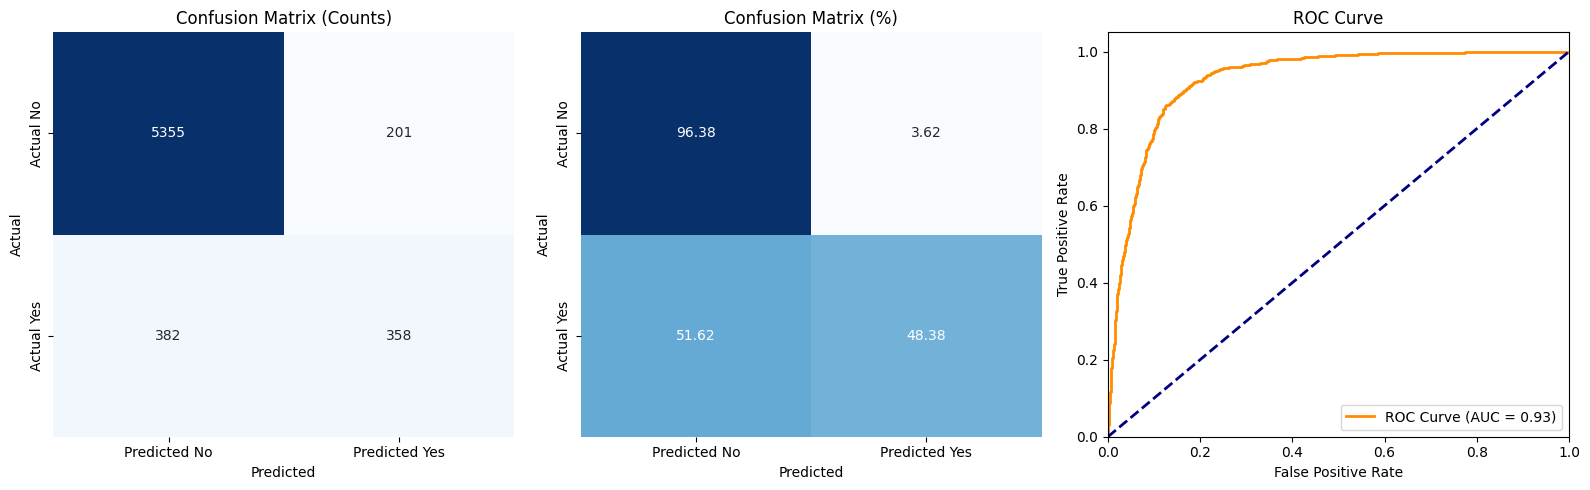

In [ ]:
gb_param_distributions = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'max_features': ['sqrt', 'log2', None],
    'subsample': uniform(0.6, 0.4),
    'min_samples_leaf': randint(1, 10)
}

gb_model = GradientBoostingClassifier(random_state=42)

best_params_gbc, best_score_gbc, best_estimator_gbc = run_randomized_search(
    gb_model, gb_param_distributions, X_train, y_train, model_name="Gradient Boosting Classifier"
)

y_pred_gb, y_prob_gb = visualize_metrics(best_estimator_gbc, X_test, y_test, model_name="Gradient Boosting Classifier")

In [ ]:
!pip install xgboost

### 5. XGBoost Classifier Model

Starting Randomized Search for XGBoost Classifier...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Randomized Search for XGBoost Classifier completed.

Best parameters found for XGBoost Classifier:
{'colsample_bytree': np.float64(0.935552788417904), 'gamma': np.float64(0.05990213464750792), 'learning_rate': np.float64(0.11284688768272232), 'max_depth': 3, 'n_estimators': 230, 'reg_alpha': np.float64(0.4299702033681603), 'reg_lambda': np.float64(0.34015376929388985)}
Best cross-validation recall_score for XGBoost Classifier: 0.8746621621621621

--- XGBoost Classifier Evaluation Metrics ---
Accuracy : 0.8542
Precision: 0.4398
Recall   : 0.8784
F1-Score : 0.5861
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5556
           1       0.44      0.88      0.59       740

    accuracy                           0.85      6296
   macro avg       0.71      0.86      0.75      6296
weighted avg       0.92      0.85      0.87      6296



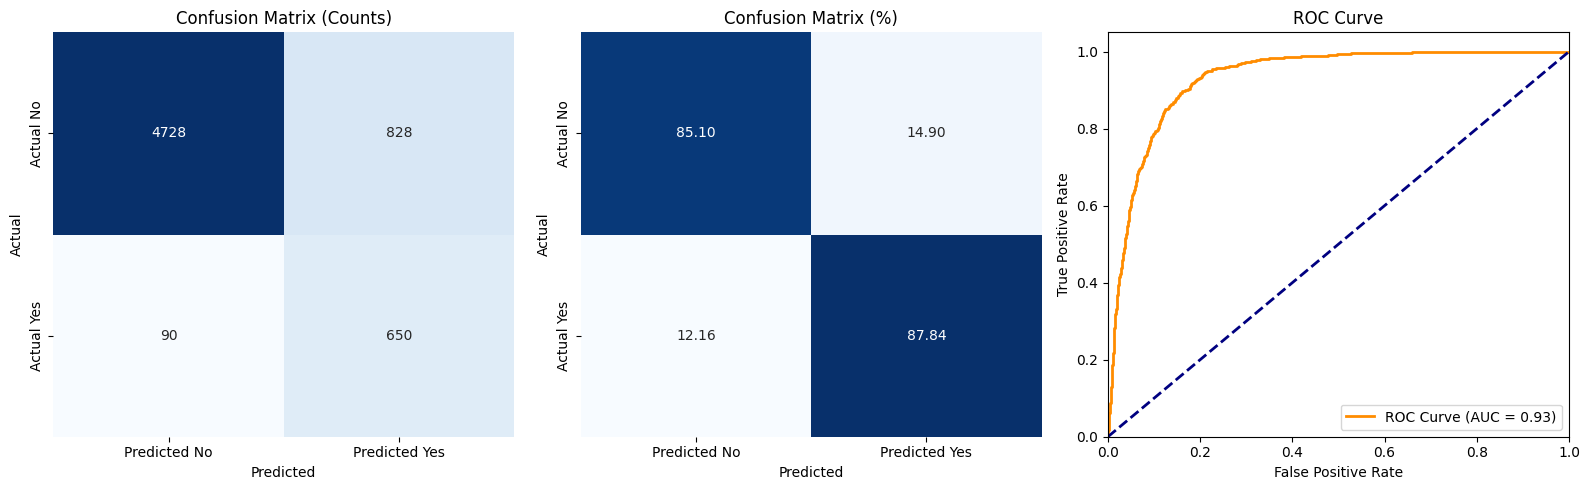

In [ ]:
positive_class_count = y_train.sum()
negative_class_count = len(y_train) - positive_class_count
scale_pos_weight = negative_class_count / positive_class_count if positive_class_count > 0 else 1.0

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

xgb_param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.3),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 0.5)
}

best_params_xgb, best_score_xgb, best_estimator_xgb = run_randomized_search(
    xgb_model, xgb_param_distributions, X_train, y_train, model_name="XGBoost Classifier"
)

y_pred_xgb, y_prob_xgb = visualize_metrics(best_estimator_xgb, X_test, y_test, model_name="XGBoost Classifier")


Model Performance by Recall Score

1. Logisitic Regression (80.81%)
2. Random Forest (88.92%) -------------------- BEST
3. Extra Tree Classifier (88.24%)
4. Gradient Boosting Classifier (48.38%)
5. XGBoost Classifier (87.84%)

# Using Test Dataset

In [ ]:
# Read the CSV file into a DataFrame
df_test = pd.read_csv(file_path_test)

## Applied same procedure like training dataset

In [ ]:
# drop target column
df_test.drop(['target'], axis = 1,inplace=True)

In [ ]:
df_test.head()

,id,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432176974,5,may,283,69546777,35,male,manager,married,uniGraduated,no,76,no,no,cellPhone,1,362.0,9,failure
1,432157692,18,jul,111,69546887,31,male,manager,married,uniGraduated,no,557,yes,no,cellPhone,1,NaN,0,unknown
2,432170850,29,jan,475,69550874,26,male,technical,single,uniGraduated,no,1274,no,no,landline,2,NaN,0,unknown
3,432151613,5,jun,209,69560082,26,male,worker,married,highSchool,no,986,yes,no,unknown,3,NaN,0,unknown
4,432167744,18,nov,459,69561716,32,male,worker,single,highSchool,no,3845,yes,no,cellPhone,3,NaN,0,unknown


In [ ]:
# Check missing value
df_test.isnull().sum()

,0
id,0
day,0
month,0
duration,0
contactId,0
age,0
gender,0
job,0
maritalStatus,0
education,0


In [ ]:
# Change NaN value in "daySinceLastCampaign" with -1 as Never using Campaign at all
df_test['daySinceLastCampaign'].fillna(-1, inplace=True)

/tmp/ipython-input-90-2246498352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['daySinceLastCampaign'].fillna(-1, inplace=True)


In [ ]:
# Delete id and contactid column
df_test.drop(['id', 'contactId'], axis=1, inplace=True)

In [ ]:
# One hot encoding categorical column
categorical_column = ['job', 'maritalStatus', 'contactType','month', 'lastCampaignResult']

df_test = pd.get_dummies(df_test, columns=categorical_column)

In [ ]:
education_order = {
    'unknown': 0,
    'secondarySchool': 1,
    'highSchool': 2,
    'uniGraduated': 3
}

df_test['education_encoded'] = df_test['education'].map(education_order)
df_test = df_test.drop('education', axis=1)

In [ ]:
# Change gender, house, credit, and creditFailure value to 0 and 1
df_test['gender'] = df_test['gender'].map({'male': 1, 'female': 0})
df_test['house'] = df_test['house'].map({'no': 0, 'yes': 1})
df_test['credit'] = df_test['credit'].map({'no': 0, 'yes': 1})
df_test['creditFailure'] = df_test['creditFailure'].map({'no': 0, 'yes': 1})


In [ ]:
# delete lastCampaignResult_unknown and education_uniGraduated column
df_test.drop(['lastCampaignResult_unknown'], axis=1, inplace=True)

In [ ]:
# applying same normalization on test data
df_test_normalization = scaler.transform(df_test)

## Load the best model for test dataset


--- Evaluating Random Forest Classifier with Best Manual Parameters ---
Evaluating on the hold-out X_test and y_test...

--- Random Forest Classifier (Manual Best Params) Evaluation Metrics ---
Accuracy : 0.8169
Precision: 0.3806
Recall   : 0.8892
F1-Score : 0.5330
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5556
           1       0.38      0.89      0.53       740

    accuracy                           0.82      6296
   macro avg       0.68      0.85      0.71      6296
weighted avg       0.91      0.82      0.84      6296



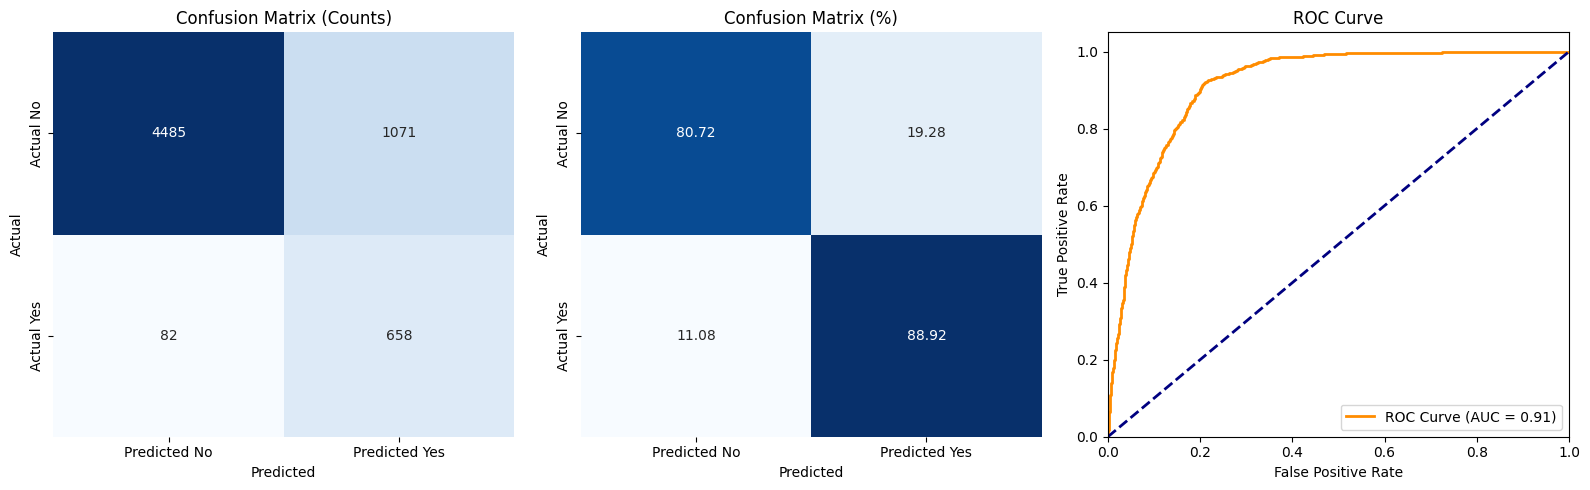

(array([0, 0, 1, ..., 1, 1, 0]),
 array([0.21201741, 0.39658132, 0.56155368, ..., 0.59897165, 0.58294895,
        0.4399635 ]))

In [ ]:
# Use the best parameters found for Random Forest Classifier
best_rf_params_manual = {
    'max_depth': 28,
    'max_features': 'log2',
    'min_samples_leaf': 38,
    'min_samples_split': 387,
    'n_estimators': 241
}

print("\n--- Evaluating Random Forest Classifier with Best Manual Parameters ---")


rf_best_manual_model = RandomForestClassifier(
    n_estimators=best_rf_params_manual['n_estimators'],
    max_depth=best_rf_params_manual['max_depth'],
    min_samples_split=best_rf_params_manual['min_samples_split'],
    min_samples_leaf=best_rf_params_manual['min_samples_leaf'],
    max_features=best_rf_params_manual['max_features'],
    random_state=42,
    class_weight='balanced'
)

rf_best_manual_model.fit(X_train, y_train)

print("Evaluating on the hold-out X_test and y_test...")
visualize_metrics(rf_best_manual_model, X_test, y_test, model_name="Random Forest Classifier (Manual Best Params)")


In [ ]:
# Get the predicted probabilities for the positive class (class 1)
test_probabilities = rf_best_manual_model.predict_proba(df_test_normalization)[:, 1]

result_df = pd.DataFrame({
    'probability_yes': test_probabilities
})

In [ ]:
result_df

,probability_yes
0,0.638724
1,0.153933
2,0.622488
3,0.186355
4,0.564768
...,...
13726,0.225050
13727,0.283370
13728,0.157956
13729,0.143476


In [ ]:
# Merge test dataset with result
df_test_with_result = pd.concat([df_test, result_df], axis=1)

In [ ]:
# show with probability yes > 0.5
df_test_with_result[df_test_with_result['probability_yes'] > 0.5]

,day,duration,age,gender,creditFailure,accountBalance,house,credit,numberOfContacts,daySinceLastCampaign,...,month_mar,month_may,month_nov,month_oct,month_sep,lastCampaignResult_failure,lastCampaignResult_other,lastCampaignResult_success,education_encoded,probability_yes
0,5,283,35,1,0,76,0,0,1,362.0,...,False,True,False,False,False,True,False,False,3,0.638724
2,29,475,26,1,0,1274,0,0,2,-1.0,...,False,False,False,False,False,False,False,False,3,0.622488
4,18,459,32,1,0,3845,1,0,3,-1.0,...,False,False,True,False,False,False,False,False,2,0.564768
5,2,491,34,1,0,490,1,0,1,-1.0,...,False,False,False,False,False,False,False,False,3,0.639028
11,25,471,59,0,0,5706,1,0,2,-1.0,...,False,False,False,False,False,False,False,False,2,0.576106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13716,2,220,53,0,0,1759,0,0,3,-1.0,...,False,False,False,False,False,False,False,False,3,0.623814
13717,23,1073,30,1,0,278,1,1,1,-1.0,...,False,True,False,False,False,False,False,False,2,0.543436
13718,20,693,47,1,0,7741,1,0,3,-1.0,...,False,False,True,False,False,False,False,False,3,0.678009
13724,15,1257,49,0,0,716,1,0,3,-1.0,...,False,True,False,False,False,False,False,False,2,0.568954
